# Create a tiled mosaic of CHMs using by year(s)

#### Workflow steps: 
1.  `cavm_buffer_above_shrubs.ipynb` --> creates the AOI needed for mosaic
2.  `mosaic_chm_dinvo3.ipynb` --> creates a tiles mosaic of CHM data with masking within AOI
3.  `summarize_chm_dinov3_create.ipynb` --> computes height class summary table
4.  `summarize_chm_dinov3_plot.ipynb` --> uses height class smry to plot bar/donut plot
5.  `map_chm_dinov3.ipynb` --> map corresponding to data plotted from summary

Paul Montesano  
Feb 2026

In [2]:
import geopandas as gpd
import mosaiclib
import importlib

/explore/nobackup/people/pmontesa/.nccstmp/ipykernel_906576/1192402722.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab

In [3]:
CAVM_BUF100km_LAND_FN = '/explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/cavm_treeline_buf100_land_alaska.gpkg'

In [4]:
cavm_buf = gpd.read_file(CAVM_BUF100km_LAND_FN)

/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
/panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3

<Axes: >

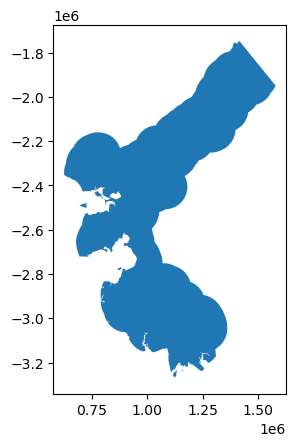

In [5]:
cavm_buf.plot()

In [6]:
MAINDIR = '/explore/nobackup/projects/above/misc'

<Axes: >

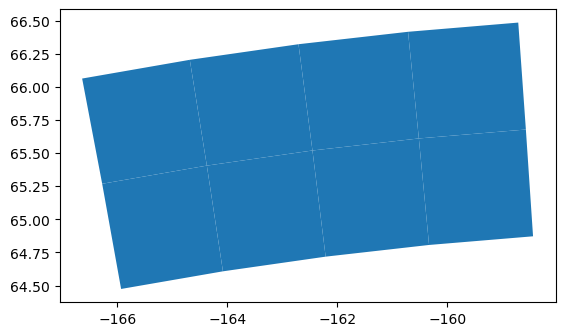

In [7]:
tiles = gpd.read_file(f"{MAINDIR}/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/mosaic_grid.gpkg")
tiles_subset_seward = tiles.to_crs(4326).cx[-165:-159,65:66]
tiles_subset_seward.plot()

<Axes: >

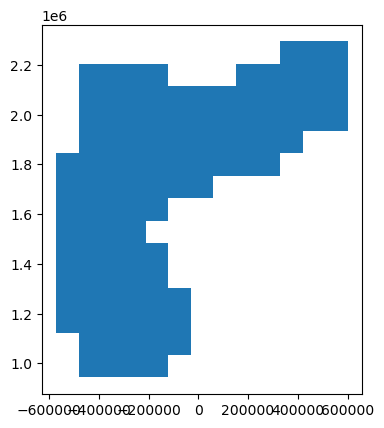

In [8]:
#tiles_subset = tiles.to_crs(4326).cx[-165:-159,65:66]
tiles_subset = tiles[~tiles.tile_id.isin(tiles_subset_seward.tile_id.to_list())]
tiles_subset = tiles

tiles_subset.plot()


### Determine list of tiles to process

In [9]:
TEST = False
TEST_STR = ''

In [10]:
if TEST:
    TEST_STR = 'TEST'
    tile_list = ['R0005C0002','R0009C0001'] 
else:
    tile_list = tiles_subset.tile_id.to_list()

In [11]:
print(tile_list)

['R0000C0001', 'R0000C0002', 'R0000C0003', 'R0000C0004', 'R0001C0001', 'R0001C0002', 'R0001C0003', 'R0001C0004', 'R0001C0005', 'R0002C0000', 'R0002C0001', 'R0002C0002', 'R0002C0003', 'R0002C0004', 'R0002C0005', 'R0003C0000', 'R0003C0001', 'R0003C0002', 'R0003C0003', 'R0003C0004', 'R0003C0005', 'R0004C0000', 'R0004C0001', 'R0004C0002', 'R0004C0003', 'R0004C0004', 'R0005C0000', 'R0005C0001', 'R0005C0002', 'R0005C0003', 'R0005C0004', 'R0006C0000', 'R0006C0001', 'R0006C0002', 'R0006C0003', 'R0007C0000', 'R0007C0001', 'R0007C0002', 'R0007C0003', 'R0007C0004', 'R0008C0000', 'R0008C0001', 'R0008C0002', 'R0008C0003', 'R0008C0004', 'R0008C0005', 'R0008C0006', 'R0009C0000', 'R0009C0001', 'R0009C0002', 'R0009C0003', 'R0009C0004', 'R0009C0005', 'R0009C0006', 'R0009C0007', 'R0009C0008', 'R0009C0009', 'R0010C0001', 'R0010C0002', 'R0010C0003', 'R0010C0004', 'R0010C0005', 'R0010C0006', 'R0010C0007', 'R0010C0008', 'R0010C0009', 'R0010C0010', 'R0011C0001', 'R0011C0002', 'R0011C0003', 'R0011C0004', 'R001

In [14]:
importlib.reload(mosaiclib)

<module 'mosaiclib' from '/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py'>

In [15]:
# =============================================================================
# EXAMPLE USAGE
# =============================================================================

# Paths (UPDATE THESE)
footprints_gpkg =      f"{MAINDIR}/ABoVE_Shrubs/footprints/footprints_chm_dinov3_4.3.2.5.gpkg" #ABoVE_Shrubs/footprints/footprints_chm_20231014_chm_002m.gpkg" 
mask_footprints_gpkg = f"{MAINDIR}/ABoVE_Shrubs/footprints/footprints_2026_chm_4.3.2.5_dm_10m.gpkg"  # Optional

# Parameters
aoi = CAVM_BUF100km_LAND_FN #'alaska'  # Or path to shapefile/geopackage
target_year = 2018
target_doy = 212  # July 31
delta_years = 8
grid_size_km = 90
output_resolution = 10  # meters
n_jobs = 35  # Use all cores
include_months = [7,8,9]

months_str = ''.join([str(i) for i in include_months])
output_dir =           f"{MAINDIR}/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_{target_year}_{target_doy}_deltayr{delta_years}_months{months_str}_{output_resolution:02}m{TEST_STR}"

# Run processing
results_df, vrt_path = mosaiclib.create_gridded_mosaic(
        footprints_gpkg=footprints_gpkg,
        aoi_geom=aoi,
        output_dir=output_dir,
        target_year=target_year,
        target_doy=target_doy,
        delta_years=delta_years,
        grid_size_km=grid_size_km,
        output_resolution=output_resolution,
        target_crs=None,  # Auto-detect
        mask_footprints_gpkg=mask_footprints_gpkg,
        n_jobs=n_jobs,
        include_months=include_months,  # Summer months only (optional)
        tile_ids=tile_list  # Process all tiles (or specify list like ['R0001C0002', 'R0003C0005'])
    )

print(f"\nMosaic VRT: {vrt_path}")


GRIDDED MOSAIC CREATION
Target year: 2018
Year range: 2010 to 2026 (±8 years)
Target DOY: 212
Include months: [7, 8, 9]
Grid size: 90 km
Output resolution: 10 m
Output directory: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m

Loading footprints...
Loaded 3219 footprints
Parsing 'date' field into year, month, day...
  Date range: 2010-05-02 00:00:00 to 2020-08-12 00:00:00

Filtering footprints by temporal window:
  Year range: 2010 to 2026
  After year filter: 3219 → 3219 images
  After month filter: 1753 images (months: [7, 8, 9])

Loading mask footprints...
Loaded 3219 mask footprints

Filtering mask footprints by temporal window:
  Year range: 2010 to 2026
  Before filter: 3219 mask images
  Years in mask data: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
  After year filter: 3219 mask images
  Remaining years: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
  Month range: [7,

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyte


Processing tile: R0001C0004
  Found 8 intersecting images
  8 images within temporal range
  Temporal scores range: 32.0 - 2203.0 days
  Reading metadata (dtype, nodata) from: WV03_20180901_M1BS_1040010041617B00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 8 rasters with priority filling
  Temporal score range: 32 - 2203 days
    Loading mask: WV03_20180901_M1BS_1040010041617B00-chm-dm-10m.tif
      Valid pixels: 76,006,700/81,000,000 (93.8%)
    Loading mask: WV03_20180902_M1BS_1040010043972900-chm-dm-10m.tif
      Valid pixels: 79,542,660/81,000,000 (98.2%)
    Raster 1/8: WV03_20180902_M1BS_1040010043972900-sr-02m.chm.tif
      Date: 2018-09-02 | Temporal score: 33 days
      Pixels used: 1,207,306 | Total valid in raster: 1,207,306
    Loading mask: WV02_20190821_M1BS_10300100976C7000-chm-dm-10m.tif
      Valid pixels: 78,950,044/81,000,000 (97.5%)
      Masked 

[Parallel(n_jobs=35)]: Done  15 tasks      | elapsed:  6.0min


      Masked out 8,211,349 pixels (46.7% of valid data)
    Raster 10/12: WV02_20120721_M1BS_103001001BB1B000-sr-02m.chm.tif
      Date: 2012-07-21 | Temporal score: 2199 days
      Pixels used: 8,936,261 | Total valid in raster: 9,370,689
    Loading mask: WV02_20120808_M1BS_103001001B435600-chm-dm-10m.tif
      Valid pixels: 79,895,389/81,000,000 (98.6%)
      Masked out 2,524 pixels (0.2% of valid data)
    Raster 11/12: WV02_20120808_M1BS_103001001B435600-sr-02m.chm.tif
      Date: 2012-08-08 | Temporal score: 2199 days
      Pixels used: 290,687 | Total valid in raster: 1,433,036
    Loading mask: WV02_20110728_M1BS_103001000C7E1F00-chm-dm-10m.tif
      Valid pixels: 71,804,048/81,000,000 (88.6%)
      Masked out 1,784,190 pixels (38.2% of valid data)
    Raster 12/12: WV02_20110728_M1BS_103001000C7E1F00-sr-02m.chm.tif
      Date: 2011-07-28 | Temporal score: 2558 days
      Pixels used: 1,810,058 | Total valid in raster: 2,888,792

  === FLAG ASSIGNMENT (before AOI mask) ===
    

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/pro


Processing tile: R0003C0004
  Found 13 intersecting images
  13 images within temporal range
  Temporal scores range: 28.0 - 1849.0 days
  Reading metadata (dtype, nodata) from: WV02_20180703_M1BS_103001008167B500-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 13 rasters with priority filling
  Temporal score range: 28 - 1849 days
    Loading mask: WV02_20180703_M1BS_103001008167B500-chm-dm-10m.tif
      Valid pixels: 65,481,954/81,000,000 (80.8%)
      Masked out 6,620,661 pixels (47.6% of valid data)
    Raster 1/13: WV02_20180703_M1BS_103001008167B500-sr-02m.chm.tif
      Date: 2018-07-03 | Temporal score: 28 days
      Pixels used: 7,301,193 | Total valid in raster: 7,301,193
    Loading mask: WV02_20180703_M1BS_10300100818A8E00-chm-dm-10m.tif
      Valid pixels: 72,906,609/81,000,000 (90.0%)
      Masked out 2,145,236 pixels (41.4% of valid data)
    Raster 2/13:

[Parallel(n_jobs=35)]: Done  28 tasks      | elapsed:  8.5min



Processing tile: R0004C0004
  Found 12 intersecting images
  12 images within temporal range
  Temporal scores range: 28.0 - 2582.0 days
  Reading metadata (dtype, nodata) from: WV02_20180703_M1BS_103001008167B500-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 12 rasters with priority filling
  Temporal score range: 28 - 2582 days
    Loading mask: WV02_20180703_M1BS_103001008167B500-chm-dm-10m.tif
      Valid pixels: 71,375,703/81,000,000 (88.1%)
      Masked out 4,956,429 pixels (68.8% of valid data)
    Raster 1/12: WV02_20180703_M1BS_103001008167B500-sr-02m.chm.tif
      Date: 2018-07-03 | Temporal score: 28 days
      Pixels used: 2,250,586 | Total valid in raster: 2,250,586
    Loading mask: WV02_20180703_M1BS_1030010081707200-chm-dm-10m.tif
      Valid pixels: 65,108,821/81,000,000 (80.4%)
      Masked out 8,398,843 pixels (82.5% of valid data)
    Raster 2/12:

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd



Processing tile: R0002C0004
  Found 6 intersecting images
  6 images within temporal range
  Temporal scores range: 33.0 - 2202.0 days
  Reading metadata (dtype, nodata) from: WV03_20180902_M1BS_1040010043972900-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 6 rasters with priority filling
  Temporal score range: 33 - 2202 days
    Loading mask: WV03_20180902_M1BS_1040010043972900-chm-dm-10m.tif
      Valid pixels: 66,432,184/81,000,000 (82.0%)
      Masked out 3,760,456 pixels (29.5% of valid data)
    Raster 1/6: WV03_20180902_M1BS_1040010043972900-sr-02m.chm.tif
      Date: 2018-09-02 | Temporal score: 33 days
      Pixels used: 8,995,147 | Total valid in raster: 8,995,147
    Loading mask: WV02_20190821_M1BS_10300100976C7000-chm-dm-10m.tif
      Valid pixels: 69,693,845/81,000,000 (86.0%)
      Masked out 64,897 pixels (0.4% of valid data)
    Raster 2/6: WV02_201

ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)



Processing tile: R0001C0002
  Found 11 intersecting images
  11 images within temporal range
  Temporal scores range: 30.0 - 1875.0 days
  Reading metadata (dtype, nodata) from: WV02_20180701_M1BS_10300100815C4000-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 11 rasters with priority filling
  Temporal score range: 30 - 1875 days
    Loading mask: WV02_20180701_M1BS_10300100815C4000-chm-dm-10m.tif
      Valid pixels: 79,851,705/81,000,000 (98.6%)
      Masked out 109,671 pixels (2.8% of valid data)
    Raster 1/11: WV02_20180701_M1BS_10300100815C4000-sr-02m.chm.tif
      Date: 2018-07-01 | Temporal score: 30 days
      Pixels used: 3,757,463 | Total valid in raster: 3,757,463
    Loading mask: WV03_20180902_M1BS_1040010042CA3D00-chm-dm-10m.tif
      Valid pixels: 71,802,389/81,000,000 (88.6%)
    Raster 2/11: WV03_20180902_M1BS_1040010042CA3D00-sr-02m.chm.tif
      D

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/pro


Processing tile: R0005C0004
  Found 7 intersecting images
  7 images within temporal range
  Temporal scores range: 28.0 - 2582.0 days
  Reading metadata (dtype, nodata) from: WV02_20180703_M1BS_1030010081707200-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 7 rasters with priority filling
  Temporal score range: 28 - 2582 days
    Loading mask: WV02_20180703_M1BS_1030010081707200-chm-dm-10m.tif
      Valid pixels: 65,989,650/81,000,000 (81.5%)
      Masked out 6,991,046 pixels (63.0% of valid data)
    Raster 1/7: WV02_20180703_M1BS_1030010081707200-sr-02m.chm.tif
      Date: 2018-07-03 | Temporal score: 28 days
      Pixels used: 4,110,998 | Total valid in raster: 4,110,998
    Loading mask: WV03_20170722_M1BS_104001002E69E800-chm-dm-10m.tif
      Valid pixels: 76,398,382/81,000,000 (94.3%)
      Masked out 2,655 pixels (0.1% of valid data)
    Raster 2/7: WV03_2017

[Parallel(n_jobs=35)]: Done  45 out of 103 | elapsed: 12.5min remaining: 16.1min



Processing tile: R0001C0003
  Found 18 intersecting images
  18 images within temporal range
  Temporal scores range: 33.0 - 1854.0 days
  Reading metadata (dtype, nodata) from: WV03_20180902_M1BS_1040010042CA3D00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 18 rasters with priority filling
  Temporal score range: 33 - 1854 days
    Loading mask: WV03_20180902_M1BS_1040010042CA3D00-chm-dm-10m.tif
      Valid pixels: 77,879,653/81,000,000 (96.1%)
    Raster 1/18: WV03_20180902_M1BS_1040010042CA3D00-sr-02m.chm.tif
      Date: 2018-09-02 | Temporal score: 33 days
      Pixels used: 1,350,570 | Total valid in raster: 1,350,570
    Loading mask: WV02_20180910_M1BS_1030010083364E00-chm-dm-10m.tif
      Valid pixels: 71,102,281/81,000,000 (87.8%)
      Masked out 856 pixels (0.0% of valid data)
    Raster 2/18: WV02_20180910_M1BS_1030010083364E00-sr-02m.chm.tif
      Date:

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/pro


Processing tile: R0006C0003
  Found 17 intersecting images
  17 images within temporal range
  Temporal scores range: 18.0 - 1886.0 days
  Reading metadata (dtype, nodata) from: WV02_20180818_M1BS_1030010081275900-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 17 rasters with priority filling
  Temporal score range: 18 - 1886 days
    Loading mask: WV02_20180818_M1BS_1030010081275900-chm-dm-10m.tif
      Valid pixels: 79,908,786/81,000,000 (98.7%)
      Masked out 3,619 pixels (0.1% of valid data)
    Raster 1/17: WV02_20180818_M1BS_1030010081275900-sr-02m.chm.tif
      Date: 2018-08-18 | Temporal score: 18 days
      Pixels used: 3,024,855 | Total valid in raster: 3,024,855
    Loading mask: WV02_20180703_M1BS_10300100809C0700-chm-dm-10m.tif
      Valid pixels: 69,529,253/81,000,000 (85.8%)
      Masked out 6,351,423 pixels (99.3% of valid data)
    Raster 2/17: WV02

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Masked out 8,755,336 pixels (51.4% of valid data)
    Raster 6/12: WV02_20130727_M1BS_1030010025182800-sr-02m.chm.tif
      Date: 2013-07-27 | Temporal score: 1829 days
      Pixels used: 7,818,992 | Total valid in raster: 8,270,958
    Loading mask: WV02_20130727_M1BS_1030010025535300-chm-dm-10m.tif
      Valid pixels: 58,057,597/81,000,000 (71.7%)
      Masked out 8,515,416 pixels (46.9% of valid data)
    Raster 7/12: WV02_20130727_M1BS_1030010025535300-sr-02m.chm.tif
      Date: 2013-07-27 | Temporal score: 1829 days
      Pixels used: 1,997,580 | Total valid in raster: 9,630,833
    Loading mask: WV02_20130727_M1BS_1030010025C5CF00-chm-dm-10m.tif
      Valid pixels: 68,430,702/81,000,000 (84.5%)
      Masked out 6,054,712 pixels (77.7% of valid data)
    Raster 8/12: WV02_20130727_M1BS_1030010025C5CF00-sr-02m.chm.tif
      Date: 2013-07-27 | Temporal score: 1829 days
      Pixels used: 1,739,754 | Total valid in raster: 1,739,754
    Loading mask: WV02_20130727_M1BS_10300100

ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/prod/lib/gdalplugins/../libgdal.so.36)
[Parallel(n_jobs=35)]: Done  56 

      Date: 2020-08-02 | Temporal score: 733 days
      Pixels used: 181,877 | Total valid in raster: 181,877
    Loading mask: WV02_20200802_M1BS_10300100AC918E00-chm-dm-10m.tif
      Valid pixels: 78,283,770/81,000,000 (96.6%)
      Masked out 385,554 pixels (69.8% of valid data)
    Raster 9/15: WV02_20200802_M1BS_10300100AC918E00-sr-02m.chm.tif
      Date: 2020-08-02 | Temporal score: 733 days
      Pixels used: 59,330 | Total valid in raster: 166,477
    Loading mask: WV02_20200722_M1BS_10300100AB1FD100-chm-dm-10m.tif
      Valid pixels: 79,026,139/81,000,000 (97.6%)
      Masked out 138,675 pixels (99.6% of valid data)
    Raster 10/15: WV02_20200722_M1BS_10300100AB1FD100-sr-02m.chm.tif
      Date: 2020-07-22 | Temporal score: 738 days
      Pixels used: 496 | Total valid in raster: 496
    Loading mask: WV02_20200719_M1BS_10300100A9A37D00-chm-dm-10m.tif
      Valid pixels: 77,547,262/81,000,000 (95.7%)
      Masked out 556,170 pixels (98.7% of valid data)
    Raster 11/15: WV02_

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/pro

  Mosaic coverage: 56.4%
  4-band mosaic written: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/mosaic_2018_DOY212_deltayr08_months789_R0002C0001.tif
    Band 1: Raster Value
    Band 2: Year
    Band 3: Day of Year
    Band 4: Nodata Flag (0=valid, -1=non-valid/cloud/shadowss/outside extent, -2=no images, -3=outside AOI)

Processing tile: R0009C0009
  Found 7 intersecting images
  7 images within temporal range
  Temporal scores range: 58.0 - 1101.0 days
  Reading metadata (dtype, nodata) from: WV02_20180927_M1BS_1030010086B98E00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 7 rasters with priority filling
  Temporal score range: 58 - 1101 days
    Loading mask: WV02_20180927_M1BS_1030010086B98E00-chm-dm-10m.tif
      Valid pixels: 69,650,194/81,000,000 (86.0%)
      Masked out 4,277,676 pixels (45.9%

[Parallel(n_jobs=35)]: Done  67 out of 103 | elapsed: 16.7min remaining:  9.0min


      Masked out 98,317 pixels (1.5% of valid data)
    Raster 2/7: WV03_20170928_M1BS_104001003319CC00-sr-02m.chm.tif
      Date: 2017-09-28 | Temporal score: 424 days
      Pixels used: 6,462,230 | Total valid in raster: 6,462,230
    Loading mask: WV02_20140806_M1BS_10300100334BEA00-chm-dm-10m.tif
      Valid pixels: 77,697,923/81,000,000 (95.9%)
      Masked out 1,240,536 pixels (16.6% of valid data)
    Raster 3/7: WV02_20140806_M1BS_10300100334BEA00-sr-02m.chm.tif
      Date: 2014-08-06 | Temporal score: 1466 days
      Pixels used: 6,245,479 | Total valid in raster: 6,245,479
    Loading mask: WV02_20130725_M1BS_1030010024104800-chm-dm-10m.tif
      Valid pixels: 78,608,393/81,000,000 (97.0%)
    Raster 4/7: WV02_20130725_M1BS_1030010024104800-sr-02m.chm.tif
      Date: 2013-07-25 | Temporal score: 1831 days
      Pixels used: 8,496,687 | Total valid in raster: 8,814,651
    Loading mask: WV02_20130826_M1BS_10300100263C5F00-chm-dm-10m.tif
      Valid pixels: 79,221,575/81,000,00

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
ERROR 1: /panfs/ccds02/app/modules/jupyter/ilab/tensorflow-kernel/lib/python3.8/site-packages/pyproj/../../.././libtiff.so.6: version `LIBTIFF_4.6.1' not found (required by /app/jupyter/ilab/jupyter-lab/pro

      Valid pixels: 79,676,790/81,000,000 (98.4%)
      Masked out 1,784 pixels (0.1% of valid data)
    Raster 22/26: WV02_20130714_M1BS_103001002454AD00-sr-02m.chm.tif
      Date: 2013-07-14 | Temporal score: 1842 days
      Pixels used: 2,227,449 | Total valid in raster: 2,525,739
    Loading mask: WV02_20130714_M1BS_1030010024B16600-chm-dm-10m.tif
      Valid pixels: 80,617,794/81,000,000 (99.5%)
    Raster 23/26: WV02_20130714_M1BS_1030010024B16600-sr-02m.chm.tif
      Date: 2013-07-14 | Temporal score: 1842 days
      Pixels used: 837,890 | Total valid in raster: 1,217,229
    Loading mask: WV02_20120718_M1BS_103001001B492600-chm-dm-10m.tif
      Valid pixels: 79,060,785/81,000,000 (97.6%)
    Raster 24/26: WV02_20120718_M1BS_103001001B492600-sr-02m.chm.tif
      Date: 2012-07-18 | Temporal score: 2202 days
      Pixels used: 808,538 | Total valid in raster: 1,943,335
    Loading mask: WV02_20120812_M1BS_103001001B3A8200-chm-dm-10m.tif
      Valid pixels: 74,463,335/81,000,000 (9

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


    Raster 6/15: WV03_20180910_M1BS_104001004123C900-sr-02m.chm.tif
      Date: 2018-09-10 | Temporal score: 41 days
      Pixels used: 3,893,617 | Total valid in raster: 3,964,701
    Loading mask: WV03_20180910_M1BS_1040010042BEE400-chm-dm-10m.tif
      Valid pixels: 76,375,883/81,000,000 (94.3%)
      Masked out 216,172 pixels (4.3% of valid data)
    Raster 7/15: WV03_20180910_M1BS_1040010042BEE400-sr-02m.chm.tif
      Date: 2018-09-10 | Temporal score: 41 days
      Pixels used: 3,798,244 | Total valid in raster: 4,822,464
    Loading mask: WV02_20190709_M1BS_1030010093869100-chm-dm-10m.tif
      Valid pixels: 79,388,781/81,000,000 (98.0%)
    Raster 8/15: WV02_20190709_M1BS_1030010093869100-sr-02m.chm.tif
      Date: 2019-07-09 | Temporal score: 387 days
      Pixels used: 73,534 | Total valid in raster: 73,534
    Loading mask: WV02_20200711_M1BS_10300100A9190400-chm-dm-10m.tif
      Valid pixels: 77,218,990/81,000,000 (95.3%)
      Masked out 2,691,733 pixels (53.6% of valid da

[Parallel(n_jobs=35)]: Done  78 out of 103 | elapsed: 18.6min remaining:  6.0min
/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Pixels used: 356,061 | Total valid in raster: 1,036,698
    Loading mask: WV02_20150904_M1BS_10300100492C7D00-chm-dm-10m.tif
      Valid pixels: 80,943,409/81,000,000 (99.9%)
    Loading mask: WV02_20110824_M1BS_103001000D6BC800-chm-dm-10m.tif
      Valid pixels: 66,964,232/81,000,000 (82.7%)
      Masked out 966,047 pixels (35.5% of valid data)
    Raster 13/16: WV02_20110824_M1BS_103001000D6BC800-sr-02m.chm.tif
      Date: 2011-08-24 | Temporal score: 2579 days
      Pixels used: 1,731,712 | Total valid in raster: 1,755,113
    Loading mask: WV02_20110915_M1BS_103001000D9CEC00-chm-dm-10m.tif
      Valid pixels: 73,576,835/81,000,000 (90.8%)
      Masked out 4,810,105 pixels (31.0% of valid data)
    Raster 14/16: WV02_20110915_M1BS_103001000D9CEC00-sr-02m.chm.tif
      Date: 2011-09-15 | Temporal score: 2601 days
      Pixels used: 3,311,582 | Total valid in raster: 10,702,811
    Loading mask: WV02_20100731_M1BS_103001000613CA00-chm-dm-10m.tif
      Valid pixels: 78,391,250/81

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Valid pixels: 74,951,687/81,000,000 (92.5%)
      Masked out 7,798 pixels (0.1% of valid data)
    Raster 11/26: WV03_20190707_M1BS_104001004FAD5A00-sr-02m.chm.tif
      Date: 2019-07-07 | Temporal score: 389 days
      Pixels used: 5,737,509 | Total valid in raster: 6,403,456
    Loading mask: WV02_20170825_M1BS_10300100708AEE00-chm-dm-10m.tif
      Valid pixels: 78,815,177/81,000,000 (97.3%)
      Masked out 51,681 pixels (10.3% of valid data)
    Raster 12/26: WV02_20170825_M1BS_10300100708AEE00-sr-02m.chm.tif
      Date: 2017-08-25 | Temporal score: 390 days
      Pixels used: 449,922 | Total valid in raster: 449,922
    Loading mask: WV02_20190830_M1BS_1030010096C9F100-chm-dm-10m.tif
      Valid pixels: 55,046,057/81,000,000 (68.0%)
      Masked out 2,931,876 pixels (16.5% of valid data)
    Raster 13/26: WV02_20190830_M1BS_1030010096C9F100-sr-02m.chm.tif
      Date: 2019-08-30 | Temporal score: 395 days
      Pixels used: 14,864,839 | Total valid in raster: 14,887,857
    L

[Parallel(n_jobs=35)]: Done  89 out of 103 | elapsed: 19.4min remaining:  3.1min


    Raster 9/12: WV02_20140912_M1BS_1030010038835A00-sr-02m.chm.tif
      Date: 2014-09-12 | Temporal score: 1503 days
      Pixels used: 113,005 | Total valid in raster: 202,430
    Loading mask: WV02_20140927_M1BS_10300100365AEB00-chm-dm-10m.tif
      Valid pixels: 80,365,586/81,000,000 (99.2%)
    Raster 10/12: WV02_20140927_M1BS_10300100365AEB00-sr-02m.chm.tif
      Date: 2014-09-27 | Temporal score: 1518 days
      Pixels used: 1,207,463 | Total valid in raster: 2,227,550
    Loading mask: WV02_20130711_M1BS_103001002534C500-chm-dm-10m.tif
      Valid pixels: 80,623,642/81,000,000 (99.5%)
    Raster 11/12: WV02_20130711_M1BS_103001002534C500-sr-02m.chm.tif
      Date: 2013-07-11 | Temporal score: 1845 days
      Pixels used: 26,120 | Total valid in raster: 42,182
    Loading mask: WV02_20110708_M1BS_103001000B175A00-chm-dm-10m.tif
      Valid pixels: 74,433,571/81,000,000 (91.9%)
      Masked out 285,570 pixels (2.6% of valid data)
    Raster 12/12: WV02_20110708_M1BS_103001000B17

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Date: 2011-08-25 | Temporal score: 2580 days
      Pixels used: 309,175 | Total valid in raster: 2,090,208
    Loading mask: WV02_20110825_M1BS_103001000DAA0600-chm-dm-10m.tif
      Valid pixels: 80,641,584/81,000,000 (99.6%)
      Masked out 131,186 pixels (37.6% of valid data)
    Raster 13/13: WV02_20110825_M1BS_103001000DAA0600-sr-02m.chm.tif
      Date: 2011-08-25 | Temporal score: 2580 days
      Pixels used: 218,001 | Total valid in raster: 218,001

  === FLAG ASSIGNMENT (before AOI mask) ===
    Valid data (0):                                         50,971,499 pixels
    Non-valid data (cloud/shadows/s/outside extent) (-1):   20,394,552 pixels
    No images available (-2):                               9,633,949 pixels

  Applying AOI mask...
  === FLAG ASSIGNMENT (after AOI mask) ===
    All pixels are within AOI

  === RASTER USAGE SUMMARY ===
  Total rasters considered: 13
  Rasters that contributed pixels: 13

  Nodata flags:
    Valid data (0):                      

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 24 rasters with priority filling
  Temporal score range: 14 - 2570 days
    Loading mask: WV02_20180814_M1BS_10300100833AB200-chm-dm-10m.tif
      Valid pixels: 80,054,098/81,000,000 (98.8%)
      Masked out 3,610 pixels (1.2% of valid data)
    Raster 1/24: WV02_20180814_M1BS_10300100833AB200-sr-02m.chm.tif
      Date: 2018-08-14 | Temporal score: 14 days
      Pixels used: 290,614 | Total valid in raster: 290,614
    Loading mask: WV03_20180822_M1BS_1040010041071C00-chm-dm-10m.tif
      Valid pixels: 60,385,035/81,000,000 (74.5%)
      Masked out 8,955,665 pixels (84.5% of valid data)
    Raster 2/24: WV03_20180822_M1BS_1040010041071C00-sr-02m.chm.tif
      Date: 2018-08-22 | Temporal score: 22 days
      Pixels used: 1,644,153 | Total valid in raster: 1,644,153
    Loading mask: WV03_20180822_M1BS_1040010041B8AC00-chm-dm-10m.tif
      Valid pixels: 60,728,114/81,000,0

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd



    Raster 4/12: WV03_20190707_M1BS_104001004FAD5A00-sr-02m.chm.tif
      Date: 2019-07-07 | Temporal score: 389 days
      Pixels used: 3,573,436 | Total valid in raster: 3,573,436
    Loading mask: WV02_20190830_M1BS_1030010096C9F100-chm-dm-10m.tif
      Valid pixels: 68,712,423/81,000,000 (84.8%)
      Masked out 4,654,635 pixels (97.4% of valid data)
    Raster 5/12: WV02_20190830_M1BS_1030010096C9F100-sr-02m.chm.tif
      Date: 2019-08-30 | Temporal score: 395 days
      Pixels used: 126,568 | Total valid in raster: 126,568
    Loading mask: WV02_20200804_M1BS_10300100AA309700-chm-dm-10m.tif
      Valid pixels: 77,760,379/81,000,000 (96.0%)
      Masked out 14,330 pixels (0.3% of valid data)
    Raster 6/12: WV02_20200804_M1BS_10300100AA309700-sr-02m.chm.tif
      Date: 2020-08-04 | Temporal score: 735 days
      Pixels used: 176,913 | Total valid in raster: 4,826,562
    Loading mask: WV02_20200718_M1BS_10300100A847CC00-chm-dm-10m.tif
      Valid pixels: 75,537,599/81,000,000 (9

[Parallel(n_jobs=35)]: Done 100 out of 103 | elapsed: 20.5min remaining:   37.0s
/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Pixels used: 9,717,671 | Total valid in raster: 10,347,195
    Loading mask: WV02_20190830_M1BS_1030010096C9F100-chm-dm-10m.tif
      Valid pixels: 77,829,966/81,000,000 (96.1%)
    Raster 12/24: WV02_20190830_M1BS_1030010096C9F100-sr-02m.chm.tif
      Date: 2019-08-30 | Temporal score: 395 days
      Pixels used: 160,729 | Total valid in raster: 1,258,141
    Loading mask: WV02_20200714_M1BS_10300100AAD56000-chm-dm-10m.tif
      Valid pixels: 75,191,278/81,000,000 (92.8%)
      Masked out 3,562,853 pixels (99.5% of valid data)
    Raster 13/24: WV02_20200714_M1BS_10300100AAD56000-sr-02m.chm.tif
      Date: 2020-07-14 | Temporal score: 746 days
      Pixels used: 4,729 | Total valid in raster: 19,065
    Loading mask: WV03_20200709_M1BS_104001005BD88400-chm-dm-10m.tif
      Valid pixels: 80,587,160/81,000,000 (99.5%)
    Raster 14/24: WV03_20200709_M1BS_104001005BD88400-sr-02m.chm.tif
      Date: 2020-07-09 | Temporal score: 751 days
      Pixels used: 11,856 | Total valid in ras

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd



Processing tile: R0012C0011
  Found 18 intersecting images
  18 images within temporal range
  Temporal scores range: 46.0 - 2940.0 days
  Reading metadata (dtype, nodata) from: WV02_20180915_M1BS_103001008538EE00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 18 rasters with priority filling
  Temporal score range: 46 - 2940 days
    Loading mask: WV02_20180915_M1BS_103001008538EE00-chm-dm-10m.tif
      Valid pixels: 53,906,885/81,000,000 (66.6%)
      Masked out 9,918,063 pixels (66.0% of valid data)
    Raster 1/18: WV02_20180915_M1BS_103001008538EE00-sr-02m.chm.tif
      Date: 2018-09-15 | Temporal score: 46 days
      Pixels used: 5,106,116 | Total valid in raster: 5,106,116
    Loading mask: WV03_20170720_M1BS_104001002E3EE400-chm-dm-10m.tif
      Valid pixels: 74,193,793/81,000,000 (91.6%)
      Masked out 966,404 pixels (34.9% of valid data)
    Raster 2/18: W

[Parallel(n_jobs=35)]: Done 103 out of 103 | elapsed: 20.9min finished



Results saved: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/processing_results.csv

PROCESSING SUMMARY
Total tiles: 103
Successful: 103
Failed: 0
Average coverage: 33.0%

CREATING VRTs

Creating VRT from 103 tiles...
VRT created: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/mosaic_2018_DOY212_deltayr08_months789.vrt

PROCESSING COMPLETE

CREATING MOSAIC SUMMARY
CHM list saved: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/chm_list_2018_DOY212_deltayr08_months789.csv
  Total CHMs in temporal window: 1753
Summary CSV saved: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/mosaic_summary_2018_DOY212_deltayr08_months789.csv
Summary text saved: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_201

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


  === FLAG ASSIGNMENT (after AOI mask) ===
    Removed 6,839,057 pixels outside AOI (17.7%)
    Remaining: 31,809,937 pixels inside AOI

  === RASTER USAGE SUMMARY ===
  Total rasters considered: 13
  Rasters that contributed pixels: 12

  Nodata flags:
    Valid data (0):                                     31,809,937 pixels (39.3%)
    Non-valid (cloud/shadows/outside extent) (-1):      13,745,486 pixels (17.0%)
    No images available (-2):                           21,287,347 pixels (26.3%)
    Outside AOI (-3):                                   14,157,230 pixels (17.5%)
  Pixels by year:
    2010: 2,865,664 pixels (9.0%)
    2012: 5,295,057 pixels (16.6%)
    2015: 6,056,941 pixels (19.0%)
    2016: 12,811,533 pixels (40.3%)
    2019: 4,780,742 pixels (15.0%)

  Unique year-DOY combinations: 5
    2010-190 (2010-07-09): 2,865,664 pixels
    2012-191 (2012-07-09): 5,295,057 pixels
    2015-195 (2015-07-14): 6,056,941 pixels
    2016-196 (2016-07-14): 12,811,533 pixels
    2019-188 

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Date: 2014-07-29 | Temporal score: 1462 days
      Pixels used: 7,893,284 | Total valid in raster: 10,077,977
    Loading mask: WV02_20140729_M1BS_1030010034653400-chm-dm-10m.tif
      Valid pixels: 75,109,713/81,000,000 (92.7%)
      Masked out 4,924 pixels (0.1% of valid data)
    Raster 9/17: WV02_20140729_M1BS_1030010034653400-sr-02m.chm.tif
      Date: 2014-07-29 | Temporal score: 1462 days
      Pixels used: 4,125,490 | Total valid in raster: 9,175,008
    Loading mask: WV02_20140806_M1BS_1030010033662300-chm-dm-10m.tif
      Valid pixels: 76,177,723/81,000,000 (94.0%)
      Masked out 2,154,695 pixels (20.4% of valid data)
    Raster 10/17: WV02_20140806_M1BS_1030010033662300-sr-02m.chm.tif
      Date: 2014-08-06 | Temporal score: 1466 days
      Pixels used: 6,701,393 | Total valid in raster: 8,404,958
    Loading mask: WV02_20140806_M1BS_10300100334BEA00-chm-dm-10m.tif
      Valid pixels: 79,319,984/81,000,000 (97.9%)
      Masked out 565,778 pixels (15.1% of valid data)

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd



Processing tile: R0011C0004
  Found 15 intersecting images
  15 images within temporal range
  Temporal scores range: 368.0 - 1846.0 days
  Reading metadata (dtype, nodata) from: WV02_20190728_M1BS_1030010094911F00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 15 rasters with priority filling
  Temporal score range: 368 - 1846 days
    Loading mask: WV02_20190728_M1BS_1030010094911F00-chm-dm-10m.tif
      Valid pixels: 79,734,891/81,000,000 (98.4%)
      Masked out 443,100 pixels (17.9% of valid data)
    Raster 1/15: WV02_20190728_M1BS_1030010094911F00-sr-02m.chm.tif
      Date: 2019-07-28 | Temporal score: 368 days
      Pixels used: 2,032,956 | Total valid in raster: 2,032,956
    Loading mask: WV02_20190724_M1BS_10300100987EE300-chm-dm-10m.tif
      Valid pixels: 80,519,187/81,000,000 (99.4%)
      Masked out 55,420 pixels (23.8% of valid data)
    Raster 2/15: W

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


    2012-208 (2012-07-26): 3,449,470 pixels
    2019-203 (2019-07-22): 583,881 pixels
    2019-217 (2019-08-05): 4,157,430 pixels
  Mosaic coverage: 10.1%
  4-band mosaic written: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/mosaic_2018_DOY212_deltayr08_months789_R0010C0010.tif
    Band 1: Raster Value
    Band 2: Year
    Band 3: Day of Year
    Band 4: Nodata Flag (0=valid, -1=non-valid/cloud/shadowss/outside extent, -2=no images, -3=outside AOI)

Processing tile: R0012C0005
  Found 9 intersecting images
  9 images within temporal range
  Temporal scores range: 47.0 - 2574.0 days
  Reading metadata (dtype, nodata) from: WV02_20180916_M1BS_1030010085C1FD00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 9 rasters with priority filling
  Temporal score range: 47 - 2574 days
    Loading mask: WV02_201809

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To f

    Raster 11/12: WV02_20110727_M1BS_103001000B1AA200-sr-02m.chm.tif
      Date: 2011-07-27 | Temporal score: 2559 days
      Pixels used: 1,608,333 | Total valid in raster: 4,351,289
    Loading mask: WV02_20110915_M1BS_103001000DB97D00-chm-dm-10m.tif
      Valid pixels: 75,958,423/81,000,000 (93.8%)
      Masked out 2,152,475 pixels (39.6% of valid data)
    Raster 12/12: WV02_20110915_M1BS_103001000DB97D00-sr-02m.chm.tif
      Date: 2011-09-15 | Temporal score: 2601 days
      Pixels used: 986,470 | Total valid in raster: 3,288,592

  === FLAG ASSIGNMENT (before AOI mask) ===
    Valid data (0):                                         34,427,651 pixels
    Non-valid data (cloud/shadows/s/outside extent) (-1):   36,019,103 pixels
    No images available (-2):                               10,553,246 pixels

  Applying AOI mask...
  === FLAG ASSIGNMENT (after AOI mask) ===
    All pixels are within AOI

  === RASTER USAGE SUMMARY ===
  Total rasters considered: 12
  Rasters that contr

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Masked out 1,766,342 pixels (65.7% of valid data)
    Raster 9/12: WV02_20140806_M1BS_10300100334BEA00-sr-02m.chm.tif
      Date: 2014-08-06 | Temporal score: 1466 days
      Pixels used: 807,929 | Total valid in raster: 920,899
    Loading mask: WV02_20130826_M1BS_1030010026B14000-chm-dm-10m.tif
      Valid pixels: 80,067,243/81,000,000 (98.8%)
    Raster 10/12: WV02_20130826_M1BS_1030010026B14000-sr-02m.chm.tif
      Date: 2013-08-26 | Temporal score: 1851 days
      Pixels used: 3,604,400 | Total valid in raster: 3,604,400
    Loading mask: WV02_20120709_M1BS_1030010019315500-chm-dm-10m.tif
      Valid pixels: 79,889,427/81,000,000 (98.6%)
      Masked out 360,030 pixels (14.9% of valid data)
    Raster 11/12: WV02_20120709_M1BS_1030010019315500-sr-02m.chm.tif
      Date: 2012-07-09 | Temporal score: 2211 days
      Pixels used: 1,091,605 | Total valid in raster: 2,056,000
    Loading mask: WV02_20120823_M1BS_103001001B3D5500-chm-dm-10m.tif
      Valid pixels: 74,159,718/81,00

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd



    Raster 2/10: WV03_20150806_M1BS_104001000FBC6C00-sr-02m.chm.tif
      Date: 2015-08-06 | Temporal score: 1101 days
      Pixels used: 298,852 | Total valid in raster: 298,852
    Loading mask: WV03_20150706_M1BS_104001000E0C0E00-chm-dm-10m.tif
      Valid pixels: 80,781,044/81,000,000 (99.7%)
    Raster 3/10: WV03_20150706_M1BS_104001000E0C0E00-sr-02m.chm.tif
      Date: 2015-07-06 | Temporal score: 1120 days
      Pixels used: 4,480 | Total valid in raster: 4,480
    Loading mask: WV03_20150706_M1BS_104001000E5BF400-chm-dm-10m.tif
      Valid pixels: 70,698,521/81,000,000 (87.3%)
      Masked out 81 pixels (0.0% of valid data)
    Raster 4/10: WV03_20150706_M1BS_104001000E5BF400-sr-02m.chm.tif
      Date: 2015-07-06 | Temporal score: 1120 days
      Pixels used: 5,708,069 | Total valid in raster: 6,126,450
    Loading mask: WV03_20150706_M1BS_104001000EBE4300-chm-dm-10m.tif
      Valid pixels: 71,608,747/81,000,000 (88.4%)
    Raster 5/10: WV03_20150706_M1BS_104001000EBE4300-sr-0

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


  Found 12 intersecting images
  12 images within temporal range
  Temporal scores range: 11.0 - 2949.0 days
  Reading metadata (dtype, nodata) from: WV02_20180811_M1BS_103001008365E900-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 12 rasters with priority filling
  Temporal score range: 11 - 2949 days
    Loading mask: WV02_20180811_M1BS_103001008365E900-chm-dm-10m.tif
      Valid pixels: 79,048,707/81,000,000 (97.6%)
      Masked out 29,285 pixels (15.8% of valid data)
    Raster 1/12: WV02_20180811_M1BS_103001008365E900-sr-02m.chm.tif
      Date: 2018-08-11 | Temporal score: 11 days
      Pixels used: 156,291 | Total valid in raster: 156,291
    Loading mask: WV03_20180719_M1BS_1040010040168B00-chm-dm-10m.tif
      Valid pixels: 79,614,407/81,000,000 (98.3%)
      Masked out 1,074 pixels (0.0% of valid data)
    Raster 2/12: WV03_20180719_M1BS_1040010040168B00-sr-0

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


    Non-valid (cloud/shadows/outside extent) (-1):      14,045,198 pixels (17.3%)
    No images available (-2):                           4,293 pixels (0.0%)
    Outside AOI (-3):                                   0 pixels (0.0%)
  Pixels by year:
    2011: 42,083 pixels (0.1%)
    2012: 43,212 pixels (0.1%)
    2013: 60,230 pixels (0.1%)
    2015: 6,372,098 pixels (9.5%)
    2016: 241,393 pixels (0.4%)
    2017: 7,855,141 pixels (11.7%)
    2018: 26,701,657 pixels (39.9%)
    2019: 25,017,689 pixels (37.4%)
    2020: 617,006 pixels (0.9%)

  Unique year-DOY combinations: 17
  Mosaic coverage: 82.7%
  4-band mosaic written: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/mosaic_2018_DOY212_deltayr08_months789_R0008C0001.tif
    Band 1: Raster Value
    Band 2: Year
    Band 3: Day of Year
    Band 4: Nodata Flag (0=valid, -1=non-valid/cloud/shadowss/outside extent, -2=no images, -3=outside AOI)


/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Masked out 30 pixels (0.0% of valid data)
    Raster 5/10: WV02_20150710_M1BS_1030010044098500-sr-02m.chm.tif
      Date: 2015-07-10 | Temporal score: 1116 days
      Pixels used: 1,923,135 | Total valid in raster: 1,923,135
    Loading mask: WV02_20150710_M1BS_1030010044157B00-chm-dm-10m.tif
      Valid pixels: 80,295,867/81,000,000 (99.1%)
    Raster 6/10: WV02_20150710_M1BS_1030010044157B00-sr-02m.chm.tif
      Date: 2015-07-10 | Temporal score: 1116 days
      Pixels used: 720,528 | Total valid in raster: 1,502,713
    Loading mask: WV02_20150705_M1BS_1030010045B3F100-chm-dm-10m.tif
      Valid pixels: 79,747,295/81,000,000 (98.5%)
    Raster 7/10: WV02_20150705_M1BS_1030010045B3F100-sr-02m.chm.tif
      Date: 2015-07-05 | Temporal score: 1121 days
      Pixels used: 1,498,014 | Total valid in raster: 1,498,014
    Loading mask: WV02_20130821_M1BS_1030010026A96E00-chm-dm-10m.tif
      Valid pixels: 80,673,566/81,000,000 (99.6%)
    Raster 8/10: WV02_20130821_M1BS_1030010026A9

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Masked out 1,747,687 pixels (34.2% of valid data)
    Raster 8/12: WV02_20130708_M1BS_10300100242C6200-sr-02m.chm.tif
      Date: 2013-07-08 | Temporal score: 1848 days
      Pixels used: 2,011,922 | Total valid in raster: 3,356,869
    Loading mask: WV02_20130825_M1BS_103001002686A600-chm-dm-10m.tif
      Valid pixels: 79,143,600/81,000,000 (97.7%)
    Loading mask: WV02_20110718_M1BS_103001000CC05200-chm-dm-10m.tif
      Valid pixels: 72,192,696/81,000,000 (89.1%)
      Masked out 277,798 pixels (2.8% of valid data)
    Raster 9/12: WV02_20110718_M1BS_103001000CC05200-sr-02m.chm.tif
      Date: 2011-07-18 | Temporal score: 2568 days
      Pixels used: 9,097,425 | Total valid in raster: 9,775,481
    Loading mask: WV02_20110815_M1BS_103001000D5B3F00-chm-dm-10m.tif
      Valid pixels: 78,259,431/81,000,000 (96.6%)
      Masked out 6,387 pixels (0.3% of valid data)
    Raster 10/12: WV02_20110815_M1BS_103001000D5B3F00-sr-02m.chm.tif
      Date: 2011-08-15 | Temporal score: 2570 da

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


  Mosaic coverage: 7.9%
  4-band mosaic written: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/mosaic_2018_DOY212_deltayr08_months789_R0009C0005.tif
    Band 1: Raster Value
    Band 2: Year
    Band 3: Day of Year
    Band 4: Nodata Flag (0=valid, -1=non-valid/cloud/shadowss/outside extent, -2=no images, -3=outside AOI)

Processing tile: R0010C0007
  Found 11 intersecting images
  11 images within temporal range
  Temporal scores range: 54.0 - 1843.0 days
  Reading metadata (dtype, nodata) from: WV02_20180923_M1BS_1030010084D28600-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 11 rasters with priority filling
  Temporal score range: 54 - 1843 days
    Loading mask: WV02_20180923_M1BS_1030010084D28600-chm-dm-10m.tif
      Valid pixels: 78,376,074/81,000,000 (96.8%)
      Masked out 8,528 pixels (0.1% of

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


  Reading metadata (dtype, nodata) from: WV02_20180915_M1BS_103001008538EE00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 11 rasters with priority filling
  Temporal score range: 46 - 2583 days
    Loading mask: WV02_20180915_M1BS_103001008538EE00-chm-dm-10m.tif
      Valid pixels: 75,029,995/81,000,000 (92.6%)
    Loading mask: WV03_20190722_M1BS_104001004F490600-chm-dm-10m.tif
      Valid pixels: 78,309,698/81,000,000 (96.7%)
      Masked out 68,397 pixels (4.1% of valid data)
    Raster 1/11: WV03_20190722_M1BS_104001004F490600-sr-02m.chm.tif
      Date: 2019-07-22 | Temporal score: 374 days
      Pixels used: 1,618,424 | Total valid in raster: 1,618,424
    Loading mask: WV03_20170916_M1BS_10400100326B4700-chm-dm-10m.tif
      Valid pixels: 64,020,125/81,000,000 (79.0%)
      Masked out 956,831 pixels (6.5% of valid data)
    Raster 2/11: WV03_20170916_M1BS_10400

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Valid pixels: 80,377,121/81,000,000 (99.2%)
      Masked out 271,748 pixels (88.1% of valid data)
    Raster 9/15: WV02_20200710_M1BS_10300100A9D21000-sr-02m.chm.tif
      Date: 2020-07-10 | Temporal score: 750 days
      Pixels used: 1,277 | Total valid in raster: 36,558
    Loading mask: WV02_20160703_M1BS_10300100576DE300-chm-dm-10m.tif
      Valid pixels: 80,955,427/81,000,000 (99.9%)
    Loading mask: WV02_20160703_M1BS_103001005916A300-chm-dm-10m.tif
      Valid pixels: 80,289,381/81,000,000 (99.1%)
      Masked out 210,115 pixels (94.0% of valid data)
    Raster 10/15: WV02_20160703_M1BS_103001005916A300-sr-02m.chm.tif
      Date: 2016-07-03 | Temporal score: 757 days
      Pixels used: 13,458 | Total valid in raster: 13,458
    Loading mask: WV02_20130826_M1BS_1030010026B14000-chm-dm-10m.tif
      Valid pixels: 78,094,701/81,000,000 (96.4%)
      Masked out 389 pixels (0.0% of valid data)
    Raster 11/15: WV02_20130826_M1BS_1030010026B14000-sr-02m.chm.tif
      Date: 201

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To f

  4-band mosaic written: /explore/nobackup/projects/above/misc/ABoVE_Shrubs/chm/2026_chm/4.3.2.5/002m_mos_2018_212_deltayr8_months789_10m/mosaic_2018_DOY212_deltayr08_months789_R0009C0001.tif
    Band 1: Raster Value
    Band 2: Year
    Band 3: Day of Year
    Band 4: Nodata Flag (0=valid, -1=non-valid/cloud/shadowss/outside extent, -2=no images, -3=outside AOI)

Processing tile: R0011C0012
  Found 15 intersecting images
  15 images within temporal range
  Temporal scores range: 751.0 - 2954.0 days
  Reading metadata (dtype, nodata) from: WV02_20200709_M1BS_10300100A77B9E00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 15 rasters with priority filling
  Temporal score range: 751 - 2954 days
    Loading mask: WV02_20200709_M1BS_10300100A77B9E00-chm-dm-10m.tif
      Valid pixels: 78,276,034/81,000,000 (96.6%)
      Masked out 217,334 pixels (6.0% of valid data)
    Ras

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd



Processing tile: R0014C0012
  Found 4 intersecting images
  4 images within temporal range
  Temporal scores range: 1119.0 - 1482.0 days
  Reading metadata (dtype, nodata) from: WV02_20150707_M1BS_1030010046449E00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8]
  Processing 4 rasters with priority filling
  Temporal score range: 1119 - 1482 days
    Loading mask: WV02_20150707_M1BS_1030010046449E00-chm-dm-10m.tif
      Valid pixels: 68,183,185/81,000,000 (84.2%)
      Masked out 4,915,851 pixels (58.9% of valid data)
    Raster 1/4: WV02_20150707_M1BS_1030010046449E00-sr-02m.chm.tif
      Date: 2015-07-07 | Temporal score: 1119 days
      Pixels used: 3,425,559 | Total valid in raster: 3,425,559
    Loading mask: WV02_20150702_M1BS_1030010045900600-chm-dm-10m.tif
      Valid pixels: 68,386,515/81,000,000 (84.4%)
      Masked out 3,112,944 pixels (39.3% of valid data)
    Raster 2/4: W

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To f

    Raster 3/14: WV02_20180705_M1BS_103001008136CC00-sr-02m.chm.tif
      Date: 2018-07-05 | Temporal score: 26 days
      Pixels used: 28,615 | Total valid in raster: 28,615
    Loading mask: WV02_20190712_M1BS_10300100948E7500-chm-dm-10m.tif
      Valid pixels: 77,476,139/81,000,000 (95.6%)
      Masked out 192,220 pixels (2.5% of valid data)
    Raster 4/14: WV02_20190712_M1BS_10300100948E7500-sr-02m.chm.tif
      Date: 2019-07-12 | Temporal score: 384 days
      Pixels used: 6,675,281 | Total valid in raster: 7,354,140
    Loading mask: WV02_20190712_M1BS_103001009507FD00-chm-dm-10m.tif
      Valid pixels: 77,363,522/81,000,000 (95.5%)
      Masked out 37,198 pixels (0.5% of valid data)
    Raster 5/14: WV02_20190712_M1BS_103001009507FD00-sr-02m.chm.tif
      Date: 2019-07-12 | Temporal score: 384 days
      Pixels used: 6,331,442 | Total valid in raster: 7,412,511
    Loading mask: WV02_20190707_M1BS_1030010094D58B00-chm-dm-10m.tif
      Valid pixels: 78,196,643/81,000,000 (96.5%)

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


      Date: 2013-07-13 | Temporal score: 1843 days
      Pixels used: 3,374,333 | Total valid in raster: 3,374,333
    Loading mask: WV02_20130824_M1BS_1030010026497500-chm-dm-10m.tif
      Valid pixels: 76,266,138/81,000,000 (94.2%)
      Masked out 1,174,036 pixels (20.4% of valid data)
    Raster 11/14: WV02_20130824_M1BS_1030010026497500-sr-02m.chm.tif
      Date: 2013-08-24 | Temporal score: 1849 days
      Pixels used: 4,444,748 | Total valid in raster: 4,579,032
    Loading mask: WV02_20120729_M1BS_103001001ACB5D00-chm-dm-10m.tif
      Valid pixels: 65,193,538/81,000,000 (80.5%)
      Masked out 60,264 pixels (0.8% of valid data)
    Raster 12/14: WV02_20120729_M1BS_103001001ACB5D00-sr-02m.chm.tif
      Date: 2012-07-29 | Temporal score: 2191 days
      Pixels used: 7,088,823 | Total valid in raster: 7,374,006
    Loading mask: WV02_20110828_M1BS_103001000DADF300-chm-dm-10m.tif
      Valid pixels: 79,463,857/81,000,000 (98.1%)
      Masked out 575,974 pixels (48.7% of valid data

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


  Temporal scores range: 369.0 - 2209.0 days
  Reading metadata (dtype, nodata) from: WV02_20190727_M1BS_10300100979CCE00-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8]
  Processing 9 rasters with priority filling
  Temporal score range: 369 - 2209 days
    Loading mask: WV02_20190727_M1BS_10300100979CCE00-chm-dm-10m.tif
      Valid pixels: 79,578,035/81,000,000 (98.2%)
    Raster 1/9: WV02_20190727_M1BS_10300100979CCE00-sr-02m.chm.tif
      Date: 2019-07-27 | Temporal score: 369 days
      Pixels used: 496,009 | Total valid in raster: 496,009
    Loading mask: WV02_20190727_M1BS_1030010097AEB700-chm-dm-10m.tif
      Valid pixels: 78,267,113/81,000,000 (96.6%)
      Masked out 359,952 pixels (8.1% of valid data)
    Raster 2/9: WV02_20190727_M1BS_1030010097AEB700-sr-02m.chm.tif
      Date: 2019-07-27 | Temporal score: 369 days
      Pixels used: 3,792,813 | Total valid in raster: 4,11

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd



Processing tile: R0014C0010
  Found 12 intersecting images
  12 images within temporal range
  Temporal scores range: 366.0 - 2209.0 days
  Reading metadata (dtype, nodata) from: WV02_20190730_M1BS_1030010096A4F900-sr-02m.chm.tif
    Dtype: int16, Nodata: -9999.0
    Note: Year/DOY will be assigned per-pixel based on source raster
  Months in raster_list: [7, 8, 9]
  Processing 12 rasters with priority filling
  Temporal score range: 366 - 2209 days
    Loading mask: WV02_20190730_M1BS_1030010096A4F900-chm-dm-10m.tif
      Valid pixels: 78,813,803/81,000,000 (97.3%)
    Raster 1/12: WV02_20190730_M1BS_1030010096A4F900-sr-02m.chm.tif
      Date: 2019-07-30 | Temporal score: 366 days
      Pixels used: 3,296,577 | Total valid in raster: 3,296,577
    Loading mask: WV02_20190727_M1BS_10300100979CCE00-chm-dm-10m.tif
      Valid pixels: 78,929,278/81,000,000 (97.4%)
      Masked out 65,581 pixels (1.6% of valid data)
    Raster 2/12: WV02_20190727_M1BS_10300100979CCE00-sr-02m.chm.tif
     

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


    Valid data (0):                                         64,567,794 pixels
    Non-valid data (cloud/shadows/s/outside extent) (-1):   16,381,163 pixels
    No images available (-2):                               51,043 pixels

  Applying AOI mask...
  === FLAG ASSIGNMENT (after AOI mask) ===
    All pixels are within AOI

  === RASTER USAGE SUMMARY ===
  Total rasters considered: 24
  Rasters that contributed pixels: 23

  Nodata flags:
    Valid data (0):                                     64,567,794 pixels (79.7%)
    Non-valid (cloud/shadows/outside extent) (-1):      16,381,163 pixels (20.2%)
    No images available (-2):                           51,043 pixels (0.1%)
    Outside AOI (-3):                                   0 pixels (0.0%)
  Pixels by year:
    2013: 12,661,409 pixels (19.6%)
    2015: 116,425 pixels (0.2%)
    2016: 15,731 pixels (0.0%)
    2018: 37,993,999 pixels (58.8%)
    2019: 9,756,249 pixels (15.1%)
    2020: 4,023,981 pixels (6.2%)

  Unique year-DOY c

/panfs/ccds02/home/pmontesa/code/above-shrubs/notebooks/mosaiclib.py:24: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
